In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

random_state = 22520109
np.random.seed(random_state)

#load data
ins_data = pd.read_csv(r'insurance.csv')
X0 = ins_data.drop(columns = ['charges'])
Y0 = ins_data['charges'].to_numpy()



#label encode
LabEnc = LabelEncoder()
X0['sex'] = LabEnc.fit_transform(X0['sex'])
X0['smoker'] = LabEnc.fit_transform(X0['smoker'])
X0['region'] = LabEnc.fit_transform(X0['region'])

#scale data
X0 = scale(X0)
Y0 = scale(Y0)
print(X0.shape)


#split
X, X_test, y, y_test = train_test_split(X0, Y0, test_size=0.3, random_state=22520109)



(1338, 6)


In [2]:
class LinRegGD:
    def __init__(self, eta=0.001, max_it = 200, random_state=22520109):
        self.eta = eta 
        self.max_it = max_it 
        self.random_state = random_state
        self.w = None 
        self.costs = []

    def predict(self, X):
        return (X @ self.w[1:]) + self.w[0]

    def fit(self, X, y):
        #init basic values
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.costs = []

        for it in range(self.max_it):
            h = self.predict(X)         # h: hypothesis

            # h = h.reshape(h.shape[0], 1)   #fixing


            diff = y - h 


            # print(np.dot(X.T, diff).shape) #fixing 2
            # print(self.w[1:].shape)
            

            self.w[0] += self.eta * np.sum(diff)
            self.w[1:] += self.eta * np.dot(X.T, diff)

            cost = np.sum(diff ** 2)/ (2 * X.shape[0])
            self.costs.append(cost)




my model: 0.75955, with w = [ 0.00861272  0.2929833  -0.01494514  0.1676825   0.04663956  0.80071819
 -0.02819594]
SK model: 0.75955, with w = [ 0.00861272  0.2929833  -0.01494514  0.1676825   0.04663956  0.80071819
 -0.02819594]


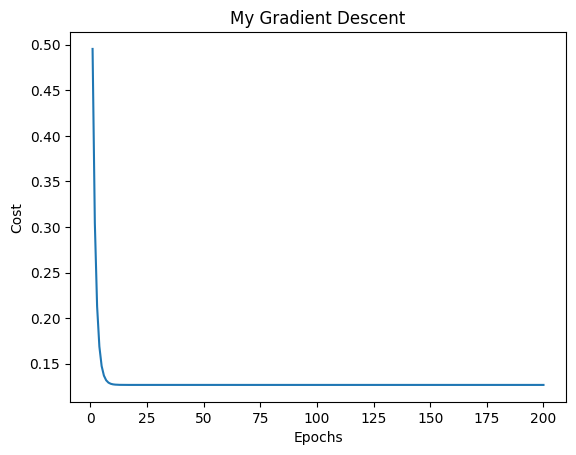

In [3]:

#train with my model 
myGD = LinRegGD(eta = 0.00033, max_it = 200, random_state=22520109)
myGD.fit(X, y)
yGD = myGD.predict(X_test)

#import model 
from sklearn.linear_model import LinearRegression
SK = LinearRegression()
SK.fit(X,y)
ySK = SK.predict(X_test)

#Compare result
from sklearn.metrics import r2_score as r2 
print("my model: {}, with w = {}".format(round(r2(y_test, yGD), 5), myGD.w))
print("SK model: {}, with w = {}".format(round(r2(y_test, ySK), 5), np.insert(SK.coef_, 0, SK.intercept_)))


#visualize
plt.plot(range(1, len(myGD.costs) + 1), myGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('My Gradient Descent')
plt.show()

In [4]:
#normal equation
pse_inv = np.linalg.inv(X.T @ X)
w = pse_inv @ X.T @ y
yNE = X_test @ w
print(round(r2(y_test, yNE), 5))

0.75998
